# 1. EDA: Indeed Hiring Lab Headline
I'm going to start with seasonally unadjusted first.

#### EDA means visualizing the data, finding similarities among variables, and seeing how the data interacts with itself.

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install numpy
%pip install nbformat


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


In [3]:
# === Step 1: Load and Inspect Dataset ===
DATA_PATH = "C:\git\SwYtch-Team-Monkey\Raw_Data\Indeed_Hiring_Lab\Total_US_Market\job-postings-headline-index-no-seasonal-adjustement.csv"
df = pd.read_csv(DATA_PATH)
print("Data types: \n", df.dtypes, "\n ---")
print("Data info: \n", df.info(), "\n ---")
df

Data types: 
 __typename      object
dateString      object
countryCode     object
countryName     object
postingType     object
value          float64
dtype: object 
 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   __typename   2058 non-null   object 
 1   dateString   2058 non-null   object 
 2   countryCode  2058 non-null   object 
 3   countryName  2058 non-null   object 
 4   postingType  2058 non-null   object 
 5   value        2058 non-null   float64
dtypes: float64(1), object(5)
memory usage: 96.6+ KB
Data info: 
 None 
 ---


<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\rojas\AppData\Local\Temp\ipykernel_76936\2877838145.py:2: SyntaxWarning: invalid escape sequence '\g'
  DATA_PATH = "C:\git\SwYtch-Team-Monkey\Raw_Data\Indeed_Hiring_Lab\Total_US_Market\job-postings-headline-index-no-seasonal-adjustement.csv"


,__typename,dateString,countryCode,countryName,postingType,value
0,HiringLabNationalPosting,2020-02-01,US,United States,TOTAL,100.00
1,HiringLabNationalPosting,2020-02-02,US,United States,TOTAL,100.06
2,HiringLabNationalPosting,2020-02-03,US,United States,TOTAL,100.09
3,HiringLabNationalPosting,2020-02-04,US,United States,TOTAL,100.18
4,HiringLabNationalPosting,2020-02-05,US,United States,TOTAL,100.29
...,...,...,...,...,...,...
2053,HiringLabNationalPosting,2025-09-15,US,United States,TOTAL,108.51
2054,HiringLabNationalPosting,2025-09-16,US,United States,TOTAL,108.47
2055,HiringLabNationalPosting,2025-09-17,US,United States,TOTAL,108.45
2056,HiringLabNationalPosting,2025-09-18,US,United States,TOTAL,108.39


In [ ]:
#lets go ahead and get rid of anything we don't need for the time being
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(columns=['__typename'])
df_cleaned

,dateString,countryCode,postingType,value
0,2020-02-01,US,TOTAL,100.00
1,2020-02-02,US,TOTAL,100.06
2,2020-02-03,US,TOTAL,100.09
3,2020-02-04,US,TOTAL,100.18
4,2020-02-05,US,TOTAL,100.29
...,...,...,...,...
2053,2025-09-15,US,TOTAL,108.51
2054,2025-09-16,US,TOTAL,108.47
2055,2025-09-17,US,TOTAL,108.45
2056,2025-09-18,US,TOTAL,108.39


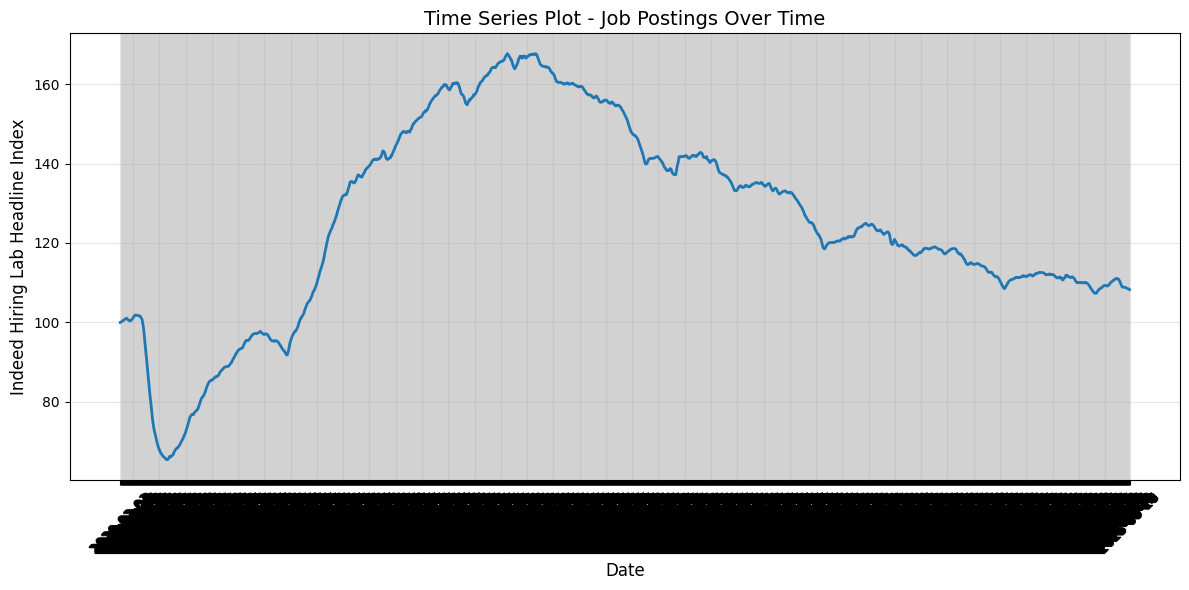

In [5]:
# Now let's create a simple time-series plot
# Assuming we have date and value columns (common in time series data)

# Set up the plot
plt.figure(figsize=(12, 6))

# Create a basic line plot
numeric_col = df_cleaned['value']
date_col = df_cleaned['dateString']

plt.plot(date_col, numeric_col, linewidth=2)
plt.title('Time Series Plot - Job Postings Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel("Indeed Hiring Lab Headline Index", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [6]:
# === Step 4: Create Box Plots ===
# Let's create box plots to understand the distribution of our data

# First, let's look at the basic statistics of our value column
print("Basic Statistics for 'value' column:")
print(df['value'].describe())
print(f"\nTotal number of observations: {len(df)}")
print(f"Unique posting types: {df['postingType'].unique()}")


Basic Statistics for 'value' column:
count    2058.000000
mean      125.680418
std        25.104254
min        65.440000
25%       110.362500
50%       123.255000
75%       142.772500
max       167.660000
Name: value, dtype: float64

Total number of observations: 2058
Unique posting types: ['TOTAL']


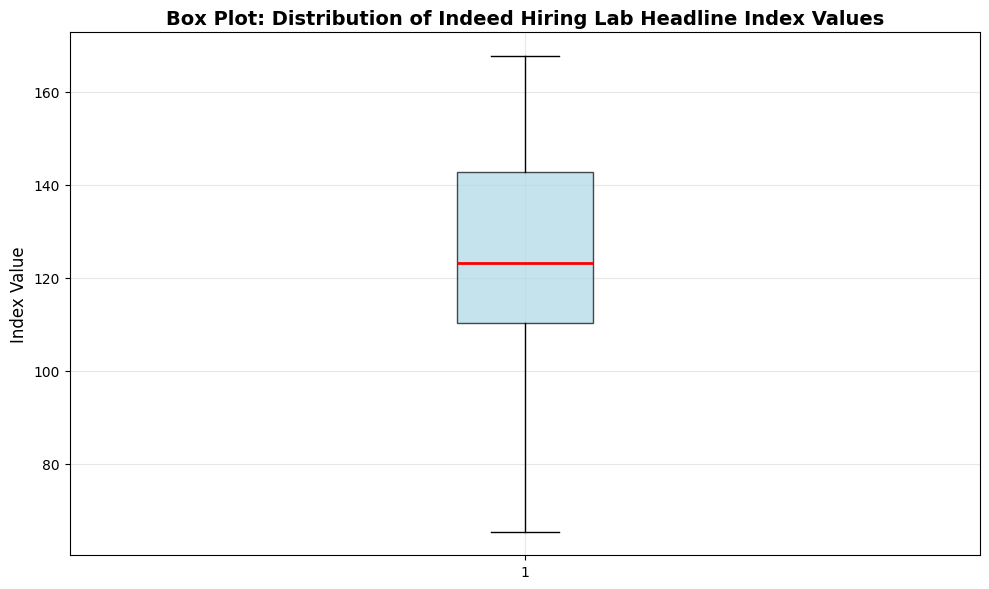

In [7]:
# Create a basic box plot for the value column
plt.figure(figsize=(10, 6))
plt.boxplot(df['value'], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5))

plt.title('Box Plot: Distribution of Indeed Hiring Lab Headline Index Values', 
          fontsize=14, fontweight='bold')
plt.ylabel('Index Value', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [8]:
# Create time-based box plots (monthly or yearly distributions)
# First, let's convert the dateString to datetime and extract time components
df_time = df_cleaned.copy()
df_time['dateString'] = pd.to_datetime(df_time['dateString'])

# Extract year and month for time-based analysis
df_time['year'] = df_time['dateString'].dt.year
df_time['month'] = df_time['dateString'].dt.month
df_time['month_name'] = df_time['dateString'].dt.month_name()

print("Date range in the data:")
print(f"From: {df_time['dateString'].min()}")
print(f"To: {df_time['dateString'].max()}")
print(f"Number of years: {df_time['year'].nunique()}")
print(f"Years: {sorted(df_time['year'].unique())}")


Date range in the data:
From: 2020-02-01 00:00:00
To: 2025-09-19 00:00:00
Number of years: 6
Years: [np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]


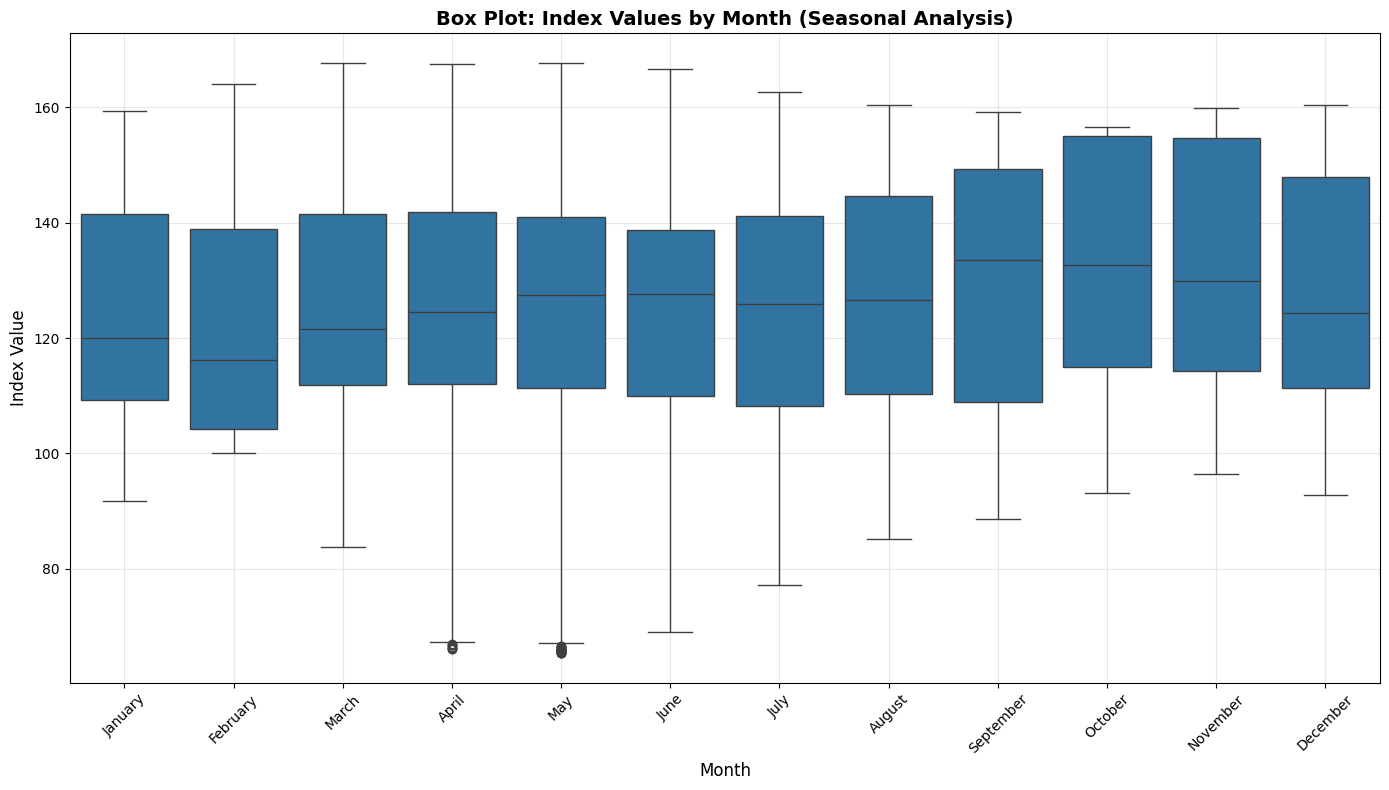

In [9]:
# Create box plots by month to see seasonal patterns
plt.figure(figsize=(14, 8))

# Order months properly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_time['month_name'] = pd.Categorical(df_time['month_name'], categories=month_order, ordered=True)


sns.boxplot(data=df_time, x='month_name', y='value')
plt.title('Box Plot: Index Values by Month (Seasonal Analysis)', fontsize=14, fontweight='bold')
plt.ylabel('Index Value', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


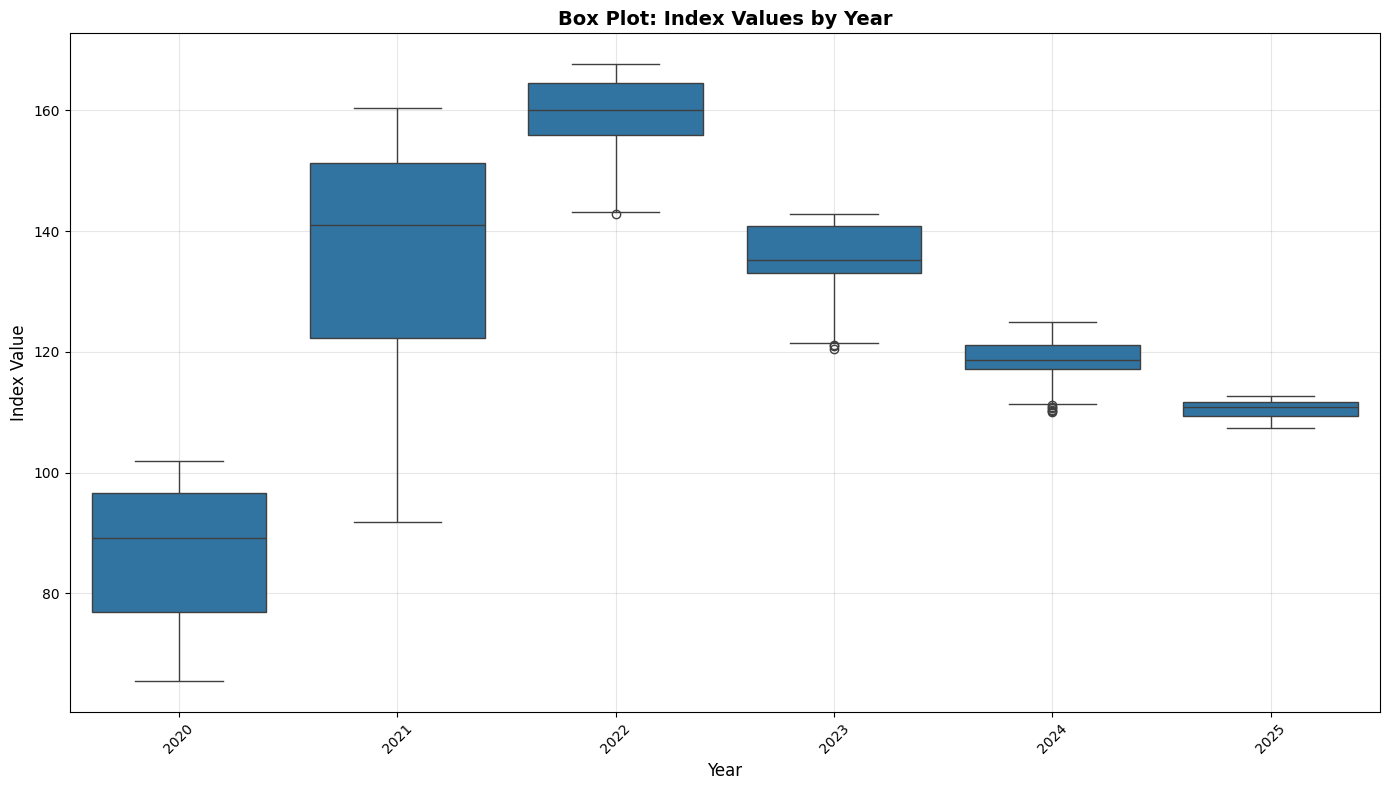

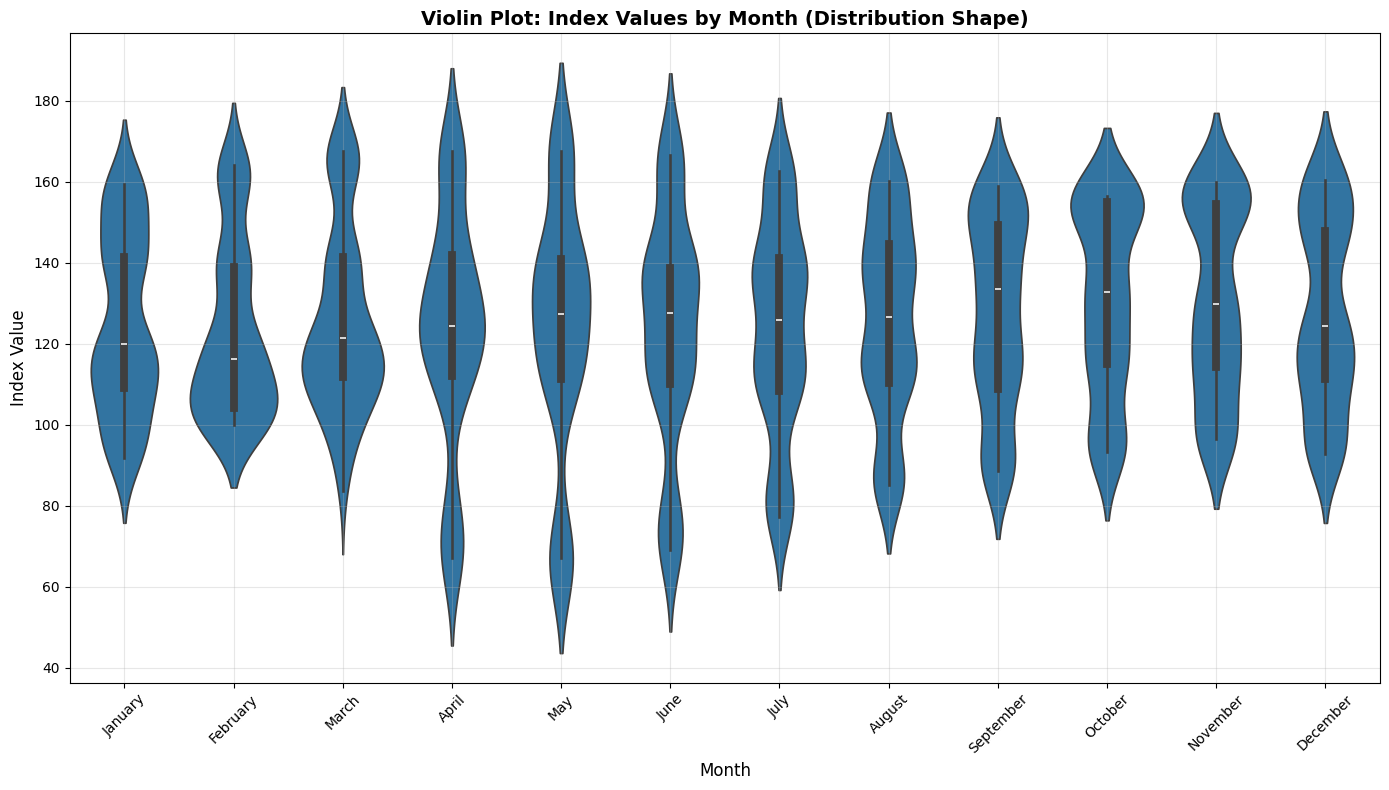

In [10]:
# Create box plots by year to see yearly trends
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_time, x='year', y='value')
plt.title('Box Plot: Index Values by Year', fontsize=14, fontweight='bold')
plt.ylabel('Index Value', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a violin plot for comparison (shows distribution shape better)
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_time, x='month_name', y='value')
plt.title('Violin Plot: Index Values by Month (Distribution Shape)', fontsize=14, fontweight='bold')
plt.ylabel('Index Value', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
# === Step 6: Create Histograms ===
# Histograms help us understand the distribution of our data

# Let's first check our clean dataframe
print("Working with clean dataframe:")
print(f"Shape: {df_cleaned.shape}")
print(f"Columns: {df_cleaned.columns.tolist()}")

# Basic statistics for the value column
print(f"\nBasic statistics for 'value' column:")
print(df_cleaned['value'].describe())


Working with clean dataframe:
Shape: (2058, 4)
Columns: ['dateString', 'countryCode', 'postingType', 'value']

Basic statistics for 'value' column:
count    2058.000000
mean      125.680418
std        25.104254
min        65.440000
25%       110.362500
50%       123.255000
75%       142.772500
max       167.660000
Name: value, dtype: float64


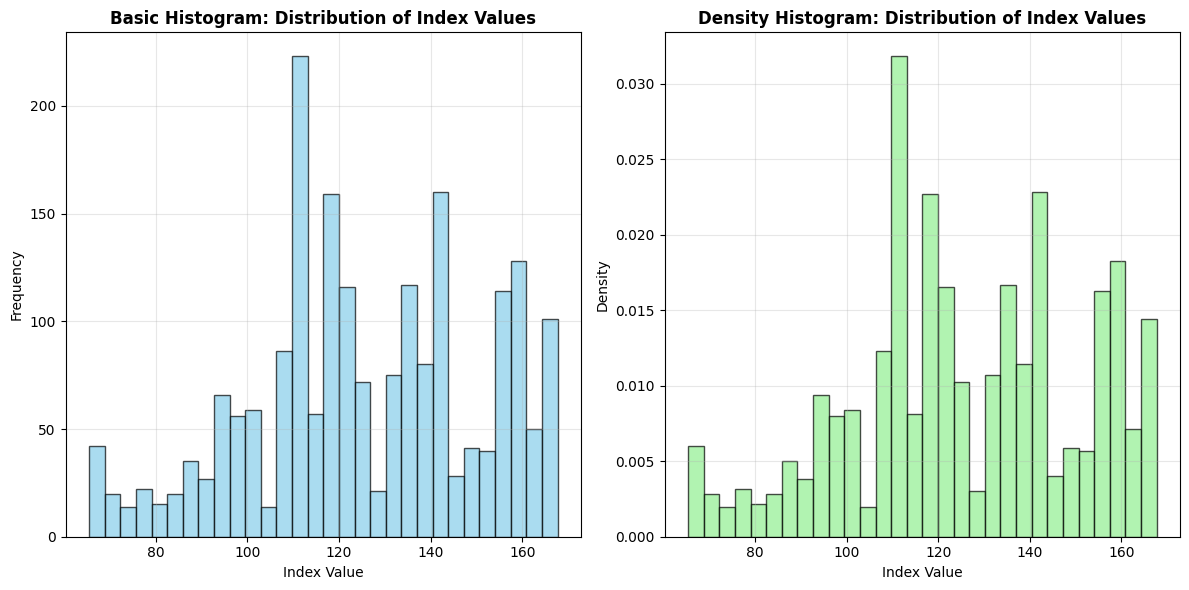

In [12]:
# Create a basic histogram using matplotlib
plt.figure(figsize=(12, 6))

# Basic histogram
plt.subplot(1, 2, 1)
plt.hist(df_cleaned['value'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Basic Histogram: Distribution of Index Values', fontsize=12, fontweight='bold')
plt.xlabel('Index Value', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)

# Histogram with density curve
plt.subplot(1, 2, 2)
plt.hist(df_cleaned['value'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
plt.title('Density Histogram: Distribution of Index Values', fontsize=12, fontweight='bold')
plt.xlabel('Index Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


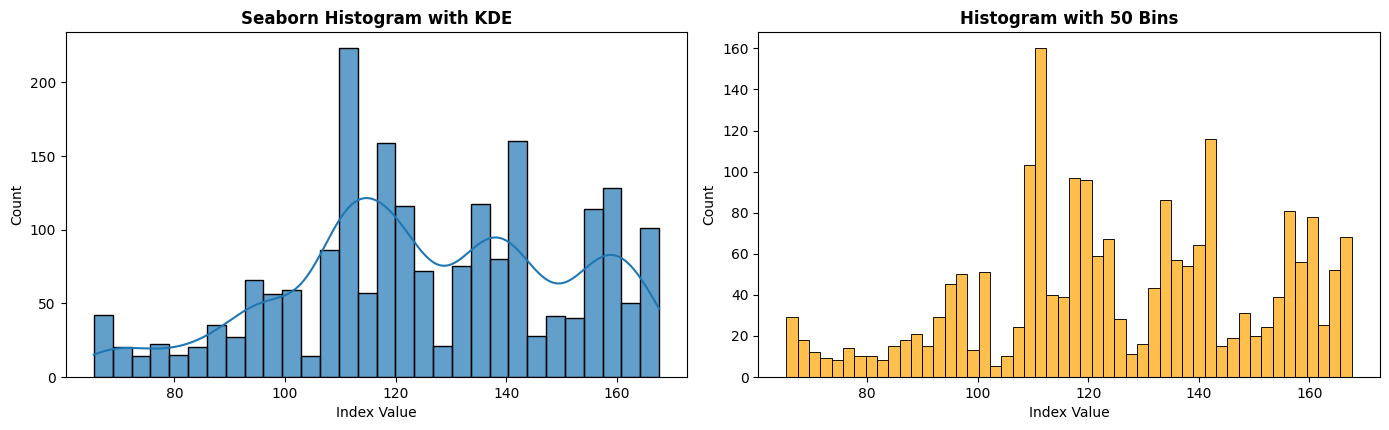

In [13]:
# Create histograms using seaborn (more beautiful and informative)
plt.figure(figsize=(14, 8))

# Seaborn histogram with KDE (Kernel Density Estimation)
plt.subplot(2, 2, 1)
sns.histplot(data=df_cleaned, x='value', bins=30, kde=True, alpha=0.7)
plt.title('Seaborn Histogram with KDE', fontsize=12, fontweight='bold')
plt.xlabel('Index Value', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Histogram with different bin sizes
plt.subplot(2, 2, 2)
sns.histplot(data=df_cleaned, x='value', bins=50, alpha=0.7, color='orange')
plt.title('Histogram with 50 Bins', fontsize=12, fontweight='bold')
plt.xlabel('Index Value', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()


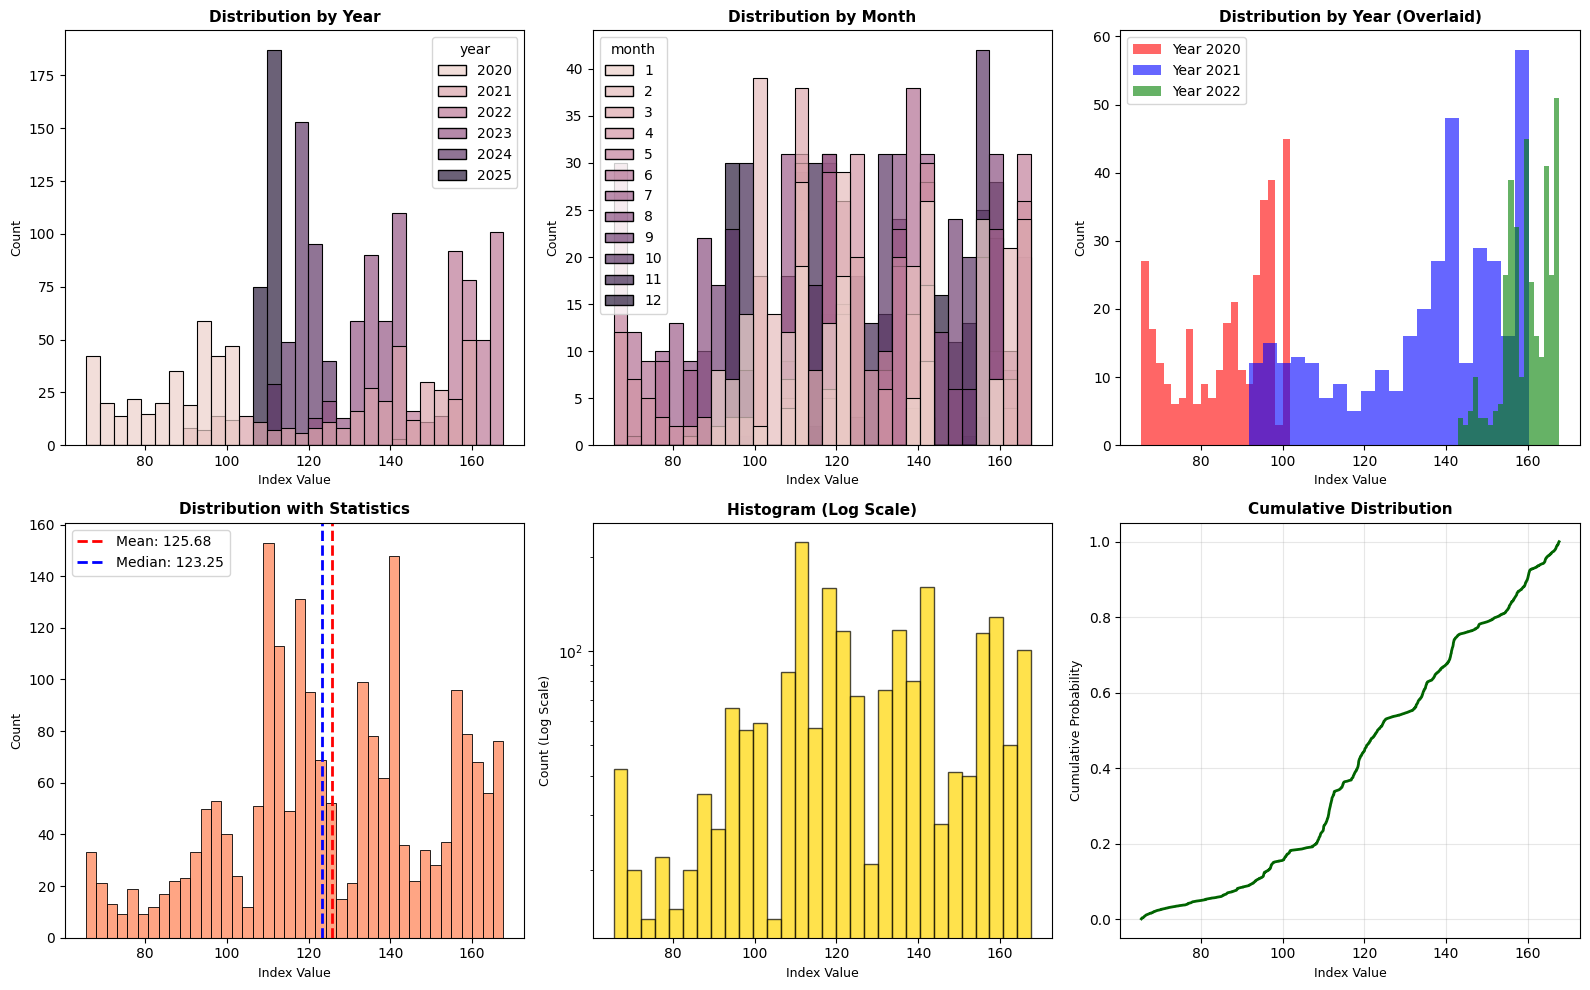

In [14]:
# Create time-based histograms (distribution by time periods)
# First, let's prepare time-based data
plt.figure(figsize=(16, 10))

# Histogram by year
plt.subplot(2, 3, 1)
if df_time['year'].nunique() > 1:
    sns.histplot(data=df_time, x='value', hue='year', bins=30, alpha=0.7)
    plt.title('Distribution by Year', fontsize=11, fontweight='bold')
else:
    sns.histplot(data=df_time, x='value', bins=30, alpha=0.7, color='blue')
    plt.title('Overall Distribution', fontsize=11, fontweight='bold')
plt.xlabel('Index Value', fontsize=9)
plt.ylabel('Count', fontsize=9)

# Histogram by month (seasonal patterns)
plt.subplot(2, 3, 2)
sns.histplot(data=df_time, x='value', hue='month', bins=30, alpha=0.7)
plt.title('Distribution by Month', fontsize=11, fontweight='bold')
plt.xlabel('Index Value', fontsize=9)
plt.ylabel('Count', fontsize=9)

# Multiple histograms in one plot (faceted)
plt.subplot(2, 3, 3)
if df_time['year'].nunique() > 1:
    # Show distribution for each year separately
    years = sorted(df_time['year'].unique())
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    for i, year in enumerate(years[:3]):  # Show first 3 years
        year_data = df_time[df_time['year'] == year]['value']
        plt.hist(year_data, bins=20, alpha=0.6, label=f'Year {year}', color=colors[i])
    plt.legend()
    plt.title('Distribution by Year (Overlaid)', fontsize=11, fontweight='bold')
else:
    sns.histplot(data=df_time, x='value', bins=30, alpha=0.7, color='green')
    plt.title('Overall Distribution', fontsize=11, fontweight='bold')
plt.xlabel('Index Value', fontsize=9)
plt.ylabel('Count', fontsize=9)

# Distribution with statistical information
plt.subplot(2, 3, 4)
sns.histplot(data=df_time, x='value', bins=40, alpha=0.7, color='coral')
# Add mean and median lines
mean_val = df_time['value'].mean()
median_val = df_time['value'].median()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.legend()
plt.title('Distribution with Statistics', fontsize=11, fontweight='bold')
plt.xlabel('Index Value', fontsize=9)
plt.ylabel('Count', fontsize=9)

# Log scale histogram (if data has wide range)
plt.subplot(2, 3, 5)
plt.hist(df_time['value'], bins=30, alpha=0.7, color='gold', edgecolor='black')
plt.yscale('log')  # Log scale for y-axis
plt.title('Histogram (Log Scale)', fontsize=11, fontweight='bold')
plt.xlabel('Index Value', fontsize=9)
plt.ylabel('Count (Log Scale)', fontsize=9)

# Cumulative distribution
plt.subplot(2, 3, 6)
sorted_values = np.sort(df_time['value'])
cumulative = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
plt.plot(sorted_values, cumulative, linewidth=2, color='darkgreen')
plt.title('Cumulative Distribution', fontsize=11, fontweight='bold')
plt.xlabel('Index Value', fontsize=9)
plt.ylabel('Cumulative Probability', fontsize=9)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [15]:
# Create interactive histogram using Plotly
print("=== Interactive Histogram with Plotly ===")

# Basic interactive histogram
fig = px.histogram(df_cleaned, x='value', nbins=30, 
                   title='Interactive Histogram: Distribution of Index Values')

fig.show()

print("Histogram analysis complete! These plots help you understand:")
print("1. The overall distribution of your data")
print("2. Whether the data is normally distributed, skewed, or has multiple peaks")
print("3. Any seasonal or yearly patterns in the distribution")
print("4. Outliers and extreme values")
print("5. How the distribution varies across different categories")


=== Interactive Histogram with Plotly ===


Histogram analysis complete! These plots help you understand:
1. The overall distribution of your data
2. Whether the data is normally distributed, skewed, or has multiple peaks
3. Any seasonal or yearly patterns in the distribution
4. Outliers and extreme values
5. How the distribution varies across different categories


In [16]:
# Create interactive histogram using Plotly (if you want interactive features)
print("=== Interactive Histogram with Plotly ===")

# Basic interactive histogram
fig = px.histogram(df_cleaned, x='value', nbins=30, 
                   title='Interactive Histogram: Distribution of Index Values',
                   labels={'value': 'Index Value', 'count': 'Frequency'})

fig.update_layout(
    xaxis_title="Index Value",
    yaxis_title="Frequency",
    font=dict(size=12)
)

fig.show()

# Interactive histogram with hover information
fig2 = px.histogram(df_cleaned, x='value', nbins=40,
                    title='Interactive Histogram with Statistics',
                    labels={'value': 'Index Value', 'count': 'Frequency'},
                    marginal="box")  # Adds a box plot on the side

fig2.update_layout(
    xaxis_title="Index Value",
    yaxis_title="Frequency",
    font=dict(size=12)
)

fig2.show()

print("Histogram analysis complete! These plots will help you understand:")
print("1. The overall distribution of your data")
print("2. Whether the data is normally distributed, skewed, or has multiple peaks")
print("3. Any seasonal or yearly patterns in the distribution")
print("4. Outliers and extreme values")
print("5. How the distribution varies across different categories")


=== Interactive Histogram with Plotly ===


Histogram analysis complete! These plots will help you understand:
1. The overall distribution of your data
2. Whether the data is normally distributed, skewed, or has multiple peaks
3. Any seasonal or yearly patterns in the distribution
4. Outliers and extreme values
5. How the distribution varies across different categories
